# Tutorial for Stacked Trapezoid model

This tutorial shows how to do simulations for stacked trapezoid model and how to fit the experimental data using this model.

In [1]:
from cdsaxs.simulations.stacked_trapezoid import StackedTrapezoidSimulation
import numpy as np

### Simulation

#### Prepare the data

In [2]:
pitch = 100 #nm distance between two lines
qzs = np.linspace(-0.5, 0.5, 121)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

#parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = 20. #same as [20., 20.]
bot_cd = 40.
swa = [80., 80.0]

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))

#simulation data
i_params = {'heights': height,
            'langles': langle,
            'rangles': rangle,
            'y_start': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg,
            }

### Description of the parameters:

dwx, dwz, i0 and bkg are the parameters necessary to calculate the Debye-waller factor which accounts for the real world imperfections in the model. You can read more about it [here](https://en.wikipedia.org/wiki/Debye%E2%80%93Waller_factor).

The other parameters are the geometrical parameters of the model. The parameters are as follows:

*y_start* - starting y-coordinate of the base of the nano structure

*bot_cd* - bottom width (CD for critical dimension) of the nano structure

*heights* - height of each individual trapezoid can be a single value or a list of values 
in case of list of values, each value corresponds to the height of each individual trapezoid.

*langles* - list of all the left bottom angles of each individual trapezoid. The dictionary which is passed should have it in radians.

*rangles* - list of all the right bottom angles of each individual trapezoid. The dictionary which is passed should have it in radians.

*weight* - weight of each individual trapezoid to account for the fact that they could be made of different materials. here we will assume that all the trapezoids are made of the same material hence the weight is not necessary.

Note: In symmetric case either left or right angle can be passed and the other will be calculated using the symmetry.


So we are constructing a line space pattern and the cross section of each line looks like following:

![double trapezoid](../assets/images/double_stack.png)







#### Create instance of the Simulation class and call `simulate_diffraction` method

Text(0.5, 1.0, 'Stacked Trapezoid diffraction simulation')

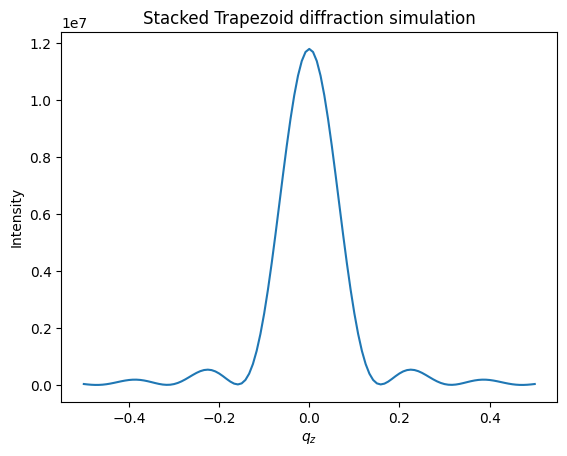

In [3]:
Simulation1 = StackedTrapezoidSimulation(qys=qxs, qzs=qzs)

intensity = Simulation1.simulate_diffraction(params=i_params)

#plot
import matplotlib.pyplot as plt
plt.plot(qzs, intensity)
plt.xlabel(r'$q_{z}$')
plt.ylabel('Intensity')
plt.title('Stacked Trapezoid diffraction simulation')

## Fitting

Now imagine you have a txt or csv file with the experimental data containing the values for $Q_{x}$, $Q_{z}$ and intensities in the format as shown below:
    
    ```
    qx, qz, intensity
    0.1, 0.2, 0.3
    0.2, 0.3, 0.4
    0.3, 0.4, 0.5
    ...
    ```

for a text file you can read the data using the following code:

```python
import numpy as np
data = np.genfromtxt('path_to_file.txt', delimiter=',', skip_header=1)
qx = data[:,0]
qz = data[:,1]
intensity = data[:,2]
```

We will suppose that we've read the data and stored it in the variables qx, qz and intensity. And we'll use the simulated intensities used in the previous section.